# Lab 3

**Zya Woodfork**

**April 28, 2025**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats


In [4]:
# Constants

mZ0 = 91.1880 #GeV/c^2
mZ0_err = 0.0020 #GeV/c^2

mW = 80.3692 #GeV/c^2
mW_err = 0.0133 #GeV/c^2

mH = 125.20 #GeV/c^2
mH_err = 0.11 #GeV/c^2

me = 0.51099895000 #MeV/c^2
me_err = 0.00000000015 #MeV/c^2

mu = 105.6583755 #MeV/c^2
mu_err = 0.0000023 #MeV/c^2

mT = 1176.93 #MeV/c^2
mT_err = 0.09 #MeV/c^2

## Part 1: The Invariant Mass Distribution

In [6]:
data = np.genfromtxt("atlas_z_to_ll.csv", delimiter = ',', skip_header=1)

In [7]:
pt1 = data[:,0]
pt2 = data[:,1]
eta1 = data[:,2]
eta2 = data[:,3]
phi1 = data[:,4]
phi2 = data[:,5]
E1 = data[:,6]
E2 = data[:,7]


In [8]:
px1 = pt1 * np.cos(phi1)
px2 = pt2 * np.cos(phi2)
px = px1 + px2

py1 = pt1 * np.sin(phi1)
py2 = pt2 * np.sin(phi2)
py = py1 + py2

pz1 = pt1 * np.sinh(eta1)
pz2 = pt2 * np.sinh(eta2)
pz = pz1 + pz2

M = np.sqrt((E1+E2)**2 - (px**2 + py**2 + pz**2))
print(M)

[92.1500371  89.28245012 88.2747245  ... 89.49674175 67.40937294
 90.84796693]


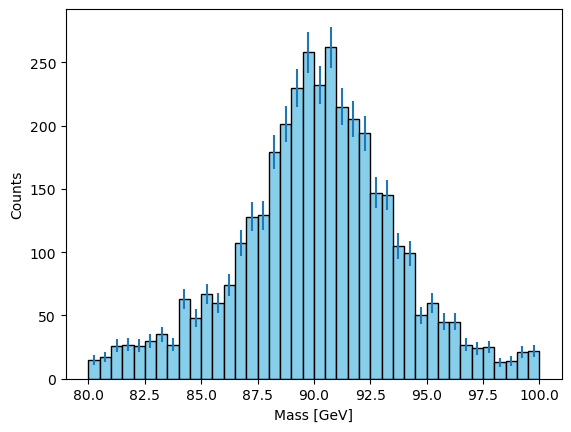

In [9]:
fig1, ax1 = plt.subplots(1,1)
bins = np.linspace(80, 100, 41)

counts, bins, patches = ax1.hist(M, bins = bins, color = "skyblue", edgecolor = "black")
counts_err = np.sqrt(counts)
bins_new = bins[0:-1]

bins_center = bins_new + 0.5*(bins[1] - bins[0])

ax1.errorbar(bins_center, counts, counts_err, fmt=" ") 
ax1.set_ylabel("Counts")
ax1.set_xlabel("Mass [GeV]")

fig1.savefig("Part_1_Plot")

## Part 2: Breit-Wigner Fit

In [11]:
mask = (bins_center > 87) & (bins_center < 93)
xdata = bins_center[mask]
ydata = counts[mask]
yerr = counts_err[mask]

In [12]:
def decay_func(m, m0, true_width):
    D = (1/np.pi) * ((true_width/2)/((m-m0)**2 + (true_width/2)**2))
    return 2500*D

In [13]:
params, covar = curve_fit(f = decay_func, xdata=xdata, ydata=ydata, sigma=yerr, absolute_sigma=True)

ytheory = decay_func(xdata, *params)
residuals = (ydata - ytheory) 

dof =  10
chi squared =  9.9850971642637
reduced chi squared =  0.9985097164263699
pvalue =  0.44180173856272975
m0 fit = 90.34080586029317 +/- 0.09351482696499493
true width fit = 6.3909983934644625


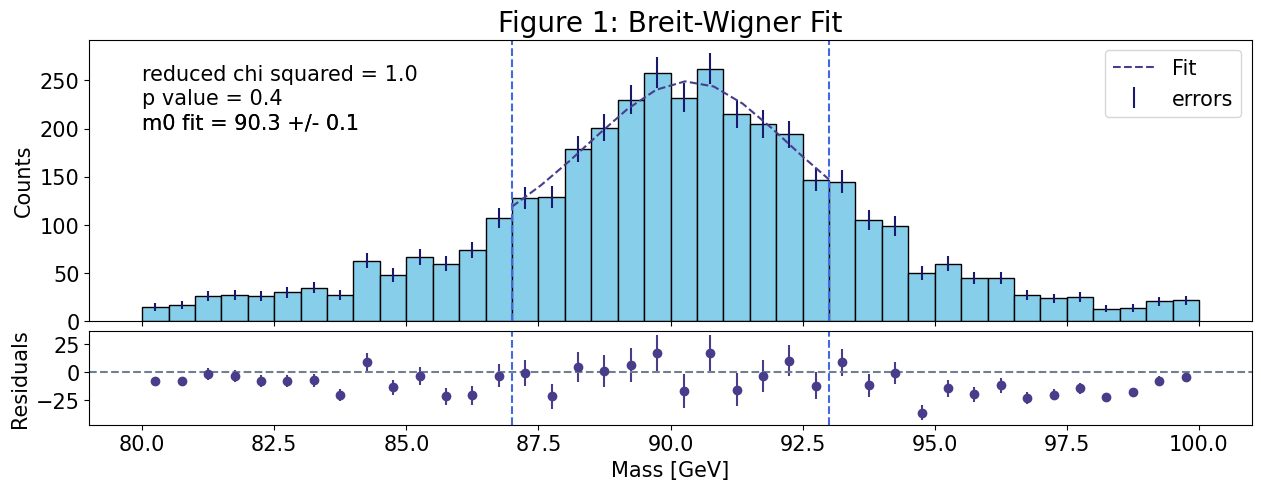

In [14]:
fig2, (ax_top, ax_bot) = plt.subplots(2, 1, sharex=True, figsize=(15,5), gridspec_kw={"height_ratios": [3,1], "hspace" : 0.05})
ax_top.set_title("Figure 1: Breit-Wigner Fit", fontsize=20)
ax_top.hist(M, bins = bins, color = "skyblue", edgecolor = "black")
ax_top.tick_params(labelsize=15)
ax_top.errorbar(bins_center, counts, counts_err, fmt=" ", c = "midnightblue", label="errors")
ax_top.set_xlabel("Mass [GeV]", fontsize=15)
ax_top.set_ylabel("Counts", fontsize=15)

m0_fit = params[0]
true_width_fit = params[1]

xdummy = np.linspace(87, 93, 12)
ydummy = decay_func(xdummy, m0_fit, true_width_fit)
ax_top.plot(xdummy, ydummy, "--", label="Fit", c="darkslateblue")

ax_top.axvline(87, color="C1", ls="--", c="royalblue")
ax_top.axvline(93, color="C1", ls="--", c="royalblue")


# residuals
resid = decay_func(bins_center, m0_fit, true_width_fit)
ynew = counts - resid
ynew_err = np.sqrt(counts)


ax_bot.errorbar(bins_center, ynew, yerr=ynew_err, fmt="o", color="darkslateblue")
ax_bot.axhline(0, color="C1", ls="--", c="slategrey")
ax_bot.axvline(87, color="C1", ls="--", c="royalblue")
ax_bot.axvline(93, color="C1", ls="--", c="royalblue")
ax_bot.set_xlabel("Mass [GeV]", fontsize=15)
ax_bot.set_ylabel("Residuals", fontsize=15)
ax_bot.tick_params(labelsize=15)

ax_top.legend(fontsize=15)






dof = len(ydata) - 2
print("dof = ", dof)

chisq = np.sum((ydata-ytheory)**2/yerr**2)
print('chi squared = ', chisq)

red_chisq = chisq/dof
print('reduced chi squared = ', red_chisq)


pvalue = stats.chi2.sf(chisq, dof)
print('pvalue = ', pvalue)

errs = np.sqrt(np.diag(covar))
print(f"m0 fit = {m0_fit} +/- {errs[0]}")

print(f"true width fit = {true_width_fit}")


ax_top.text(80,250, f"reduced chi squared = {red_chisq:.1f}", fontsize=15)
ax_top.text(80,225, f"p value = {pvalue:.1f}", fontsize=15)
ax_top.text(80,200, f"m0 fit = {m0_fit:.1f} +/- {errs[0]:.1f}", fontsize=15)
ax_top.text(80,200, f"m0 fit = {m0_fit:.1f} +/- {errs[0]:.1f}", fontsize=15)

fig2.savefig("Fig_1")

## Part 3: 2D Parameter Countors 

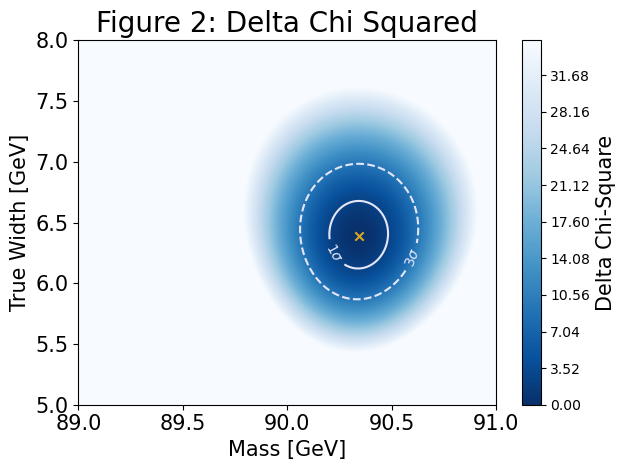

In [16]:
n_bins = 300
chi_map = np.zeros((n_bins, n_bins))
true_width = np.linspace(5, 8, n_bins)
m0 = np.linspace(89, 91, n_bins)

# the double for loop
for i in range(n_bins):
    for j in range(n_bins):
        ytheory = decay_func(xdata, m0[i], true_width[j])
        chi2 = np.sum((ydata-ytheory)**2 / yerr**2)
        chi_map[j, i] = chi2

chi_min = np.min(chi_map)
chi_map = np.clip(chi_map, chi_min, chi_min+35) # clip to 35
delta_chi_map = chi_map - chi_min

X, Y = np.meshgrid(m0, true_width)
fig3, ax1 = plt.subplots(1,1)
cs = ax1.contourf(X, Y, delta_chi_map, 500, cmap="Blues_r")
cbar = fig3.colorbar(cs, ax=ax1)
cbar.set_label("Delta Chi-Square", fontsize=15)

levels = [2.3, 9.21]
CS = ax1.contour(X, Y, delta_chi_map, levels=levels, colors=["lavender", "lavender"], linestyles=["solid", "dashed"])


ax1.set_title("Figure 2: Delta Chi Squared", fontsize=20)
ax1.set_xlabel("Mass [GeV]", fontsize=15)
ax1.set_ylabel("True Width [GeV]", fontsize=15)


fmt = {}
strings = ["1$\\sigma$", "3$\\sigma$"]
for l, s in zip(CS.levels, strings):
    fmt[l] = s
ax1.clabel(CS, CS.levels, fmt=fmt)
                               
ax1.scatter(m0_fit,true_width_fit, marker = "x", c = "goldenrod")

ax1.tick_params(labelsize=15)

fig3.tight_layout()
fig3.savefig("Fig_2")

In [17]:
# Calculating difference between accepted and calulated value of m0

In [18]:
diff = m0_fit - mZ0
print("m0_fit - mZ0 = ", diff)

m0_fit - mZ0 =  -0.8471941397068292
